In [1]:
from plotnine import *
import pandas as pd
import numpy as np

In [2]:
time = "2024-03-14_14:51"
time = "2024-03-14_15:32"
time = "2024-03-14_17:26"
time = "2024-03-14_18:18"
time = "2024-03-14_19:00"
# time = "2024-03-14_20:08"
time = "2024-03-15_10:31"
time = "2024-03-15_13:27"
time = "2024-03-15_15:44"
time = "2024-03-15_16:27"
time = "2024-03-16_13:35"
time = "2024-03-18_09:34"
# time = "2024-03-18_16:10"
# time = "2024-03-19_00:56"
# time = "2024-03-20_04:35"
time = "2024-03-20_08:28"



df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

# df['test_cumsum_annualized_return'] = df['test_cumsum_annualized_return'] * -1
# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["future_candles"] != 5]
# df = df[df["n_clusters"] != 150]
# df = df[df["n_clusters"] != 200]
# df = df[df["log_return_threshold"] <= 0.01]
# df = df[df["calmar_ratio_threshold"] == 2]

df

,window,train_sum_annualized_return,val_sum_annualized_return,val_sum_max_drawdown,val_avg_calmar_ratio,test_sum_annualized_return,test_sum_max_drawdown,test_avg_calmar_ratio,train_cumsum_annualized_return,val_cumsum_annualized_return,test_cumsum_annualized_return,train_size,test_size,random_state
0,3,0.30,0.00,0.051000,0.000000,0.16,0.061000,2.622951,0.30,0.00,0.16,9600,1920,32
1,5,1.26,0.55,0.295661,2.042658,0.22,0.516253,1.181499,1.56,0.55,0.38,9600,1920,32
2,6,2.40,0.06,0.791250,0.424278,-1.02,1.137067,-0.829851,3.96,0.61,-0.64,9600,1920,32
3,9,0.16,0.00,0.059252,0.000000,0.12,0.019692,6.093972,4.12,0.61,-0.52,9600,1920,32
4,13,0.11,0.03,0.021000,1.428571,-0.01,0.030412,-0.328820,4.23,0.64,-0.53,9600,1920,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4654,92,1.45,0.35,0.390232,1.440551,0.25,0.294496,1.127854,52.87,9.22,-2.73,9600,1920,13
4655,93,3.35,0.74,0.634354,2.262605,0.35,0.753911,5.648318,56.22,9.96,-2.38,9600,1920,13
4656,94,1.19,0.40,0.136577,4.235015,-0.91,0.966000,-0.955497,57.41,10.36,-3.29,9600,1920,13
4657,97,0.42,0.00,0.041000,0.000000,0.11,0.039095,2.813642,57.83,10.36,-3.18,9600,1920,13


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


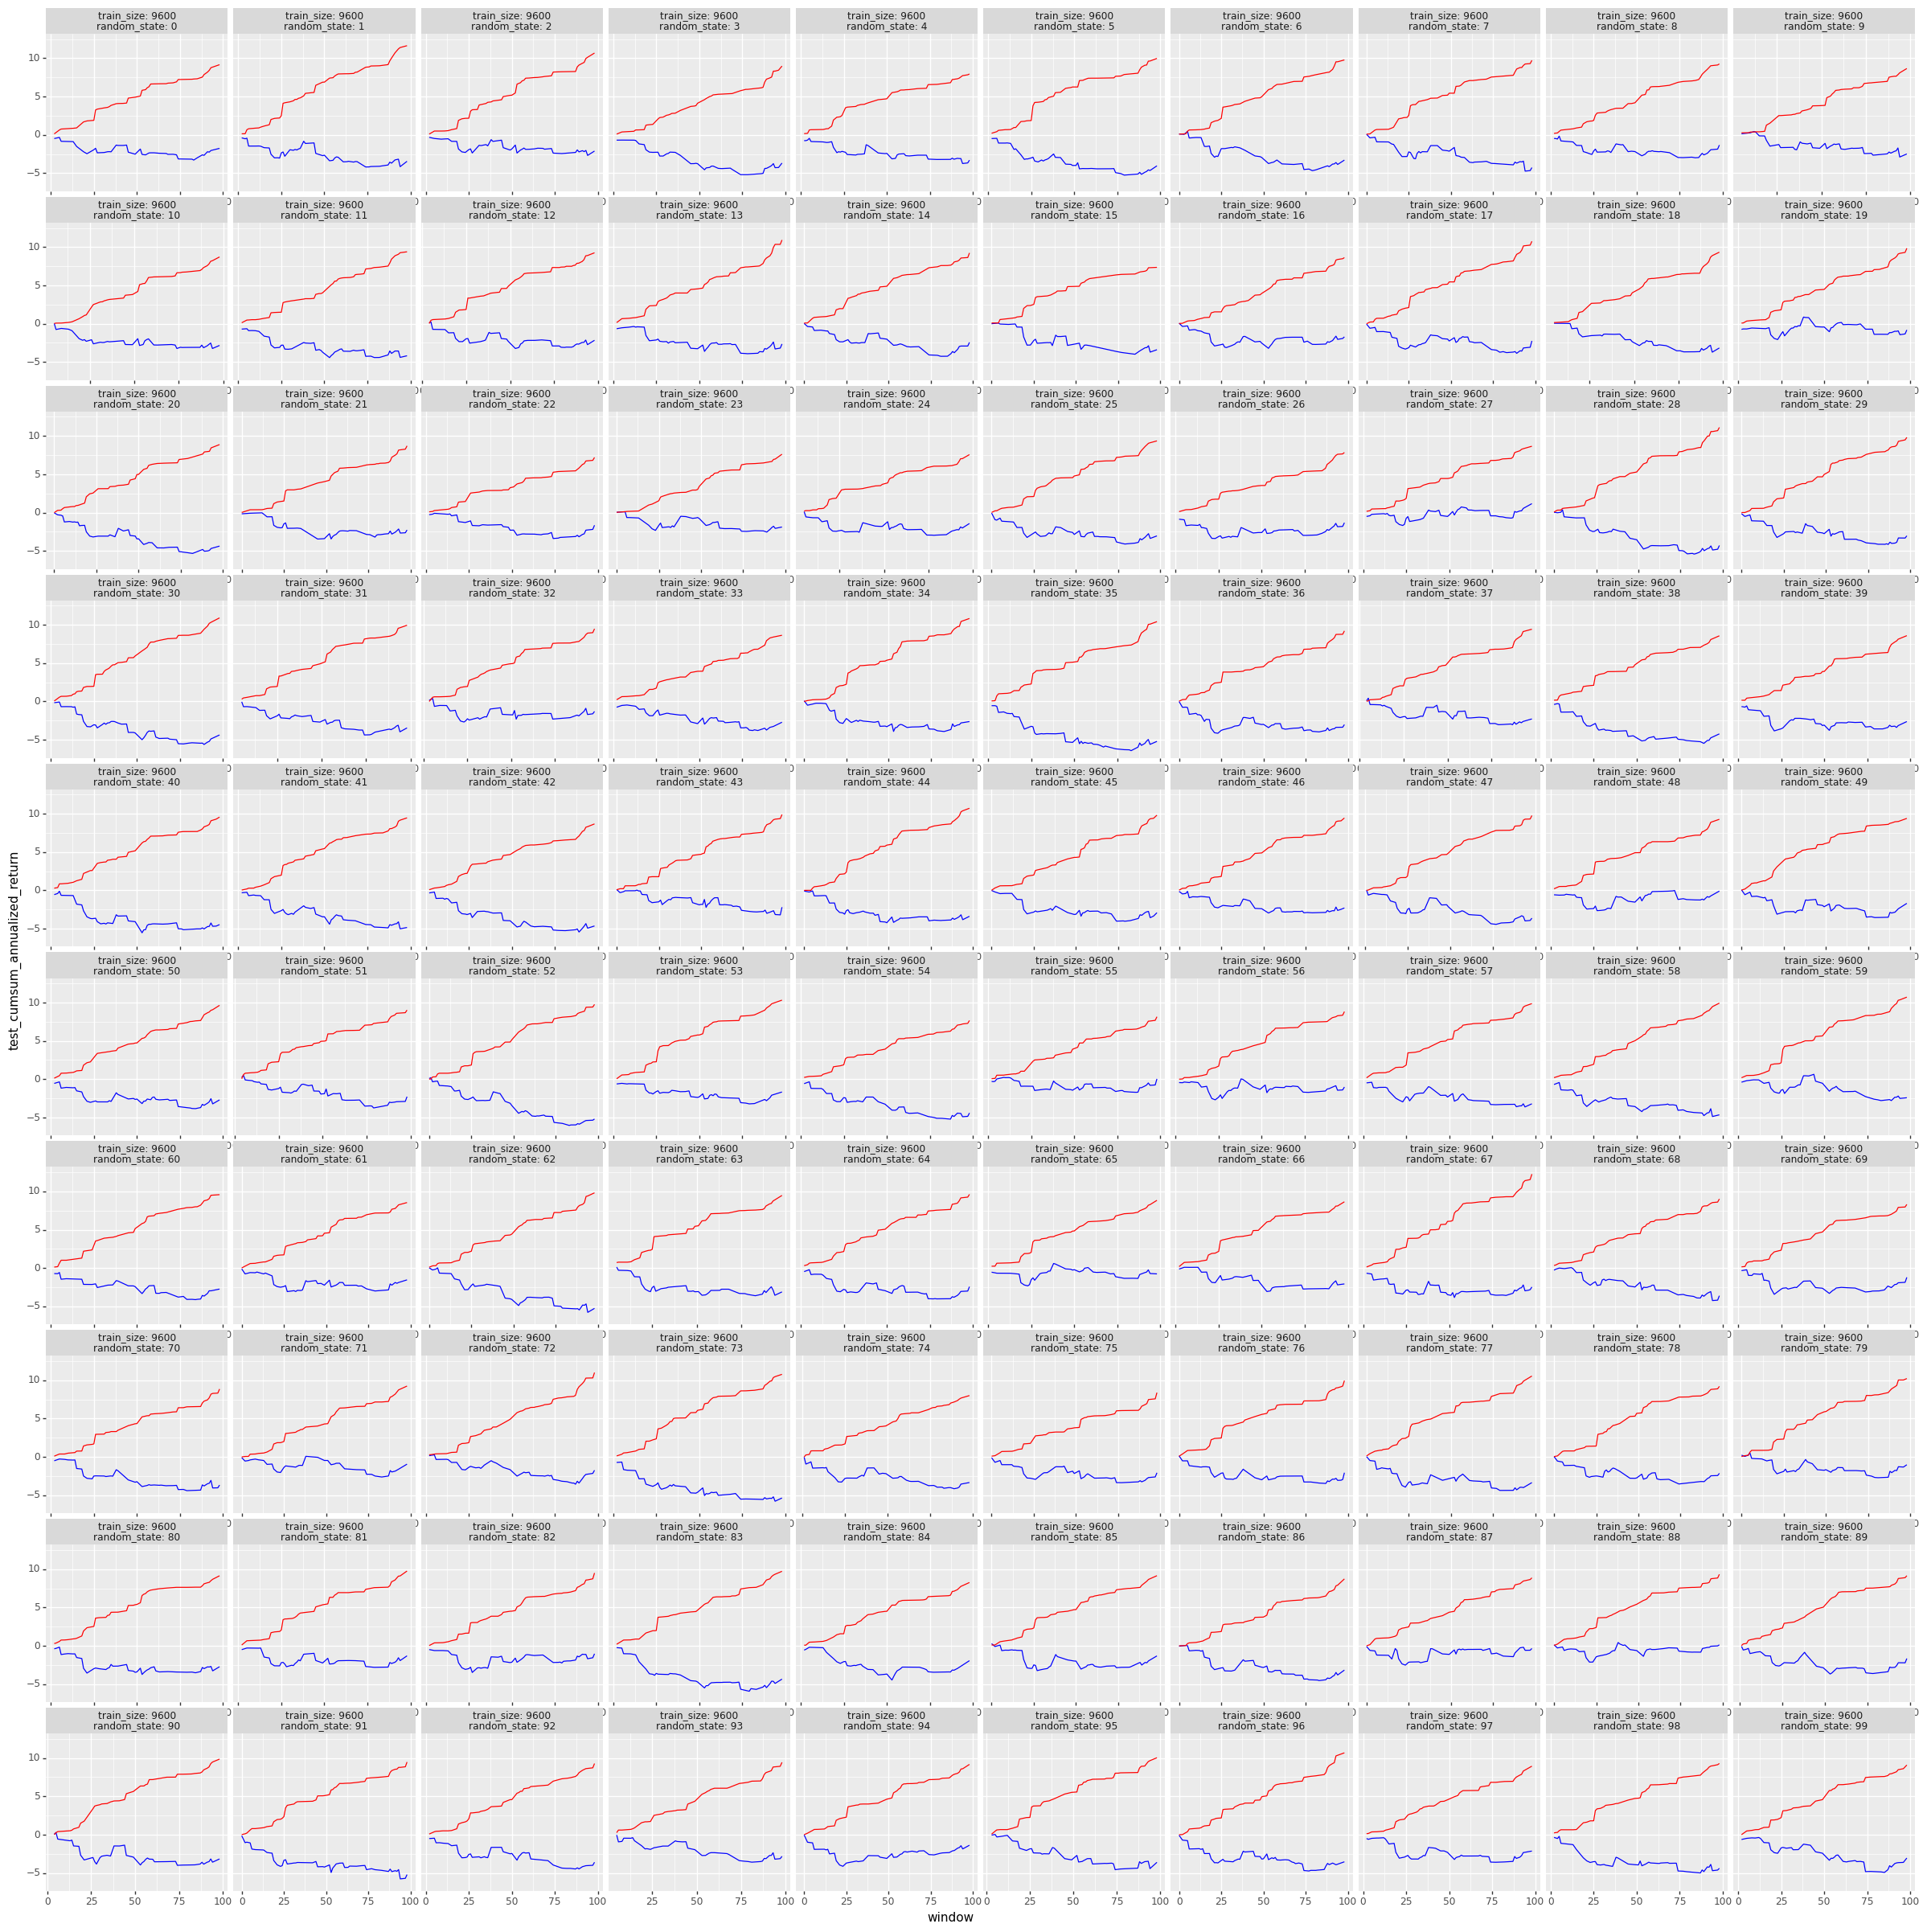

In [3]:
p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
# p = p + geom_line(aes(x="window", y="test_avg_calmar_ratio"), color="blue")
# p = p + geom_line(aes(x="window", y="val_avg_calmar_ratio"), color="red")
p = p + facet_wrap("~train_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(figure_size=(30, 30))
print(p)

In [ ]:

time = "2024-03-14_19:00"
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)